In [1]:
'''
7/22/2024

H2 Immiscibility PySR Code V3a
Data: Computational
Operators: log, sin, cos, tan, abs
Maxdepth and maxsize: Not included

Create 6 versions of the code:
w/ Computational data:
- V1a: Fit w/ log as the unary operator
- V1b: V1a w/ maxdepth and maxsize
- V2a: Fit w/ sin, cos, etc. log as unary operator
- V2b: V2a w/ maxdepth and maxsize

w/ Computational & Experimental data:
- V3a: Fit w/ sin, cos, log etc.
- V3b: V3a w/ maxdepth and maxsize


- Meet 7/24/2024 @ 4pm
- Meet 7/28/2024 @ 4pm
'''

## SHARED WITH Malik B -- 20240711

import numpy as np
from pysr import PySRRegressor
!pip install matplotlib
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
#The following are the parameters estimated based on DFT calculations
W_V = -13.06
W_U = -299.54
W_S = -8.04
W_V2 = 490.89
lambda_X1 = 2.62
lambda_X2 = -0.68

R_const = 8.314 # J/mol-K -- gas constant
grid_size = 3000

In [3]:
#get random samples of T
# T_mock_arr = np.random.uniform(750,6000,grid_size)
T_mock_data = np.array([750, 1000, 1500, 2000, 3000, 4000])
T_mock_data_new = np.array([523.15, 573.15, 598.15, 623.15, 633.15, 643.15, 647.15, 648.15, 649.15, 650.15, 651.15, 652.15, 653.15, 654.15])
# T_mock_arr = np.zeros((grid_size))
T_mock_arr = np.random.choice(T_mock_data, grid_size)
# T_mock_arr = T_mock_arr + 3000
# T_mock_arr = np.linspace(750,6000,grid_size)

#get random samples of X_H2
XH2_mock_arr = np.random.uniform(0.01,0.99,grid_size)
# XH2_mock_arr = np.linspace(0.01,0.99,grid_size) # X_H2

T_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_arr = []#np.zeros((grid_size,grid_size,grid_size))
XH2_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_norm_arr = []
P_norm_arr_2 = []

# 523.15, 573.15, 598.15, 623.15, 633.15, 643.15, 647.15, 648.15, 649.15, 650.15, 651.15, 652.15, 653.15, 654.15

In [4]:
# # Define a function to load data and skip the header {X, P, T}
# def load_data(file_path):
#     return np.genfromtxt(file_path, delimiter=',', skip_header=1)

# # Load the new data
# array_T_523_15 = load_data('New_Data_2/SF_T_250.csv')
# array_T_573_15 = load_data('New_Data_2/SF_T_300.csv')
# array_T_598_15 = load_data('New_Data_2/SF_T_325.csv')
# array_T_623_15 = load_data('New_Data_2/SF_T_350.csv')
# array_T_633_15 = load_data('New_Data_2/SF_T_360.csv')
# array_T_643_15 = load_data('New_Data_2/SF_T_370.csv')
# array_T_647_15 = load_data('New_Data_2/SF_T_374.csv')
# array_T_648_15 = load_data('New_Data_2/SF_T_375.csv')
# array_T_649_15 = load_data('New_Data_2/SF_T_376.csv')
# array_T_650_15 = load_data('New_Data_2/SF_T_377.csv')
# array_T_651_15 = load_data('New_Data_2/SF_T_378.csv')
# array_T_652_15 = load_data('New_Data_2/SF_T_379.csv')
# array_T_653_15 = load_data('New_Data_2/SF_T_380.csv')
# array_T_654_15 = load_data('New_Data_2/SF_T_381.csv')

# # Create an array with the new data
# new_data = np.vstack([array_T_523_15, 
#                       array_T_573_15, 
#                       array_T_598_15,
#                       array_T_623_15, 
#                       array_T_633_15, 
#                       array_T_643_15,
#                       array_T_647_15, 
#                       array_T_648_15, 
#                       array_T_649_15, 
#                       array_T_650_15,
#                       array_T_651_15, 
#                       array_T_652_15, 
#                       array_T_653_15, 
#                       array_T_654_15])

# new_data_OG = new_data

# # Add new data onto the existing arrays
# P_new_data = new_data[:, 1]
# T_new_data = new_data[:, 2]
# XH2_new_data = new_data[:, 0]


# # P_arr = np.append(P_arr, P_new_data)
# # T_arr = np.append(T_arr, T_new_data)
# # XH2_arr = np.append(XH2_arr, XH2_new_data)
# # P_norm_arr_2 = []

# ################################################################################################
# # This function is basically f(X_H2,T,P) = 0; X_H2O = 1 - X_H2
# ################################################################################################

In [5]:
def est_W_params_w_Y(T_d, Y_d, W_V, W_U, W_S, W_V2=0, W_V3=0, W_V4=0, flag_return_value=0):

    temp1 = (W_V + (((T_d/1000)**(-2))*W_V2))
    temp2 = (R_const*T_d*(np.log( Y_d/(1-Y_d) )) )/(2.*(2*Y_d - 1))
    temp3 = W_U - (T_d)*W_S
    P_est = (temp2 - temp3)/temp1

    if flag_return_value == 1:  
        return temp1 # W_V_eff
    if flag_return_value == 2:  
        return temp3 # W_0 or W_U - T*W_S
    else:
        return P_est
################################################################################################
################################################################################################

In [6]:
def est_lambda_X_eff(T_d, lambda_X1, lambda_X2, flag_return_value=0):

    lambda_X_eff = lambda_X1 + (lambda_X2/(T_d/1000))

    return lambda_X_eff
################################################################################################
################################################################################################

In [7]:
# Computational Data

X_mock_P_min = np.random.uniform(0.01,0.99,1000)
P_min_arr = []

for ind1 in range(len(T_mock_data)):
    P_arr_T = []
    for ind2 in range(len(X_mock_P_min)):
        T_mock = T_mock_data[ind1]
        X_mock = X_mock_P_min[ind2]
    
        lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
        lambda_X = lambda_X_eff
        
        Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
        
        P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )
    
        P_arr_T = np.append(P_arr_T, P_mock)

    P_min_arr = np.append(P_min_arr, np.min(P_arr_T))

In [8]:
################################################################################################
# This is for creating an array for immiscibility curve
################################################################################################
# for ind2 in range(len(XH2_mock_arr)):
for ind1 in range(len(T_mock_arr)):
    T_mock = T_mock_arr[ind1]
    X_mock = XH2_mock_arr[ind1]

    lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
    lambda_X = lambda_X_eff
    
    Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
    
    P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )

    T_arr = np.append(T_arr, T_mock)
    P_arr = np.append(P_arr, P_mock)
    XH2_arr = np.append(XH2_arr, X_mock)

    if(T_mock == 750):
        P_mock_norm = P_mock/P_min_arr[0]
    if(T_mock == 1000):
        P_mock_norm = P_mock/P_min_arr[1]
    if(T_mock == 1500):
        P_mock_norm = P_mock/P_min_arr[2]
    if(T_mock == 2000):
        P_mock_norm = P_mock/P_min_arr[3]
    if(T_mock == 3000):
        P_mock_norm = P_mock/P_min_arr[4]
    if(T_mock == 4000):
        P_mock_norm = P_mock/P_min_arr[5]

    P_norm_arr = np.append(P_norm_arr, P_mock_norm)
        
################################################################################################
################################################################################################

In [9]:
# Experimental Data

X_new_data_P_min = np.random.uniform(0.01,0.99,1000)
P_min_arr_2 = []
P_arr_T=[]


# Define a function to load data and skip the header {X, P, T}
def load_data(file_path):
    return np.genfromtxt(file_path, delimiter=',', skip_header=1)

array_T_523_15 = load_data('New_Data_2/SF_T_250.csv')
array_T_573_15 = load_data('New_Data_2/SF_T_300.csv')
array_T_598_15 = load_data('New_Data_2/SF_T_325.csv')
array_T_623_15 = load_data('New_Data_2/SF_T_350.csv')
array_T_633_15 = load_data('New_Data_2/SF_T_360.csv')
array_T_643_15 = load_data('New_Data_2/SF_T_370.csv')
array_T_647_15 = load_data('New_Data_2/SF_T_374.csv')
array_T_648_15 = load_data('New_Data_2/SF_T_375.csv')
array_T_649_15 = load_data('New_Data_2/SF_T_376.csv')
array_T_650_15 = load_data('New_Data_2/SF_T_377.csv')
array_T_651_15 = load_data('New_Data_2/SF_T_378.csv')
array_T_652_15 = load_data('New_Data_2/SF_T_379.csv')
array_T_653_15 = load_data('New_Data_2/SF_T_380.csv')
array_T_654_15 = load_data('New_Data_2/SF_T_381.csv')

for ind1 in range(len(T_mock_data_new)):
    T_new = T_mock_data_new[ind1]
    if(T_new == 523.15):
        P_arr_T = array_T_523_15[:,1]
        array_T_523_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 573.15):
        P_arr_T = array_T_573_15[:,1]
        array_T_573_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 598.15):
        P_arr_T = array_T_598_15[:,1]
        array_T_598_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 623.15):
        P_arr_T = array_T_623_15[:,1]
        array_T_623_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 633.15):
        P_arr_T = array_T_633_15[:,1]
        array_T_633_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 643.15):    
        P_arr_T = array_T_643_15[:,1]
        array_T_643_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 647.15):
        P_arr_T = array_T_647_15[:,1]
        array_T_647_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 648.15):
        P_arr_T = array_T_648_15[:,1]
        array_T_648_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 649.15):
        P_arr_T = array_T_649_15[:,1]
        array_T_649_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 650.15):
        P_arr_T = array_T_650_15[:,1]
        array_T_650_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 651.15):
        P_arr_T = array_T_651_15[:,1]
        array_T_651_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 652.15):    
        P_arr_T = array_T_652_15[:,1]
        array_T_652_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 653.15):
        P_arr_T = array_T_653_15[:,1]
        array_T_653_15[:,1] = P_arr_T/np.min(P_arr_T)
    if(T_new == 654.15):    
        P_arr_T = array_T_654_15[:,1]
        array_T_654_15[:,1] = P_arr_T/np.min(P_arr_T)

    # print(np.min(P_arr_T), array_T_523_15[:,1])
    # P_min_arr_2 = np.append(P_min_arr_2, np.min(P_arr_T))

In [10]:
# Create an array with the new data
new_data_norm = np.vstack([array_T_523_15, 
                      array_T_573_15, 
                      array_T_598_15,
                      array_T_623_15, 
                      array_T_633_15, 
                      array_T_643_15,
                      array_T_647_15, 
                      array_T_648_15, 
                      array_T_649_15, 
                      array_T_650_15,
                      array_T_651_15, 
                      array_T_652_15, 
                      array_T_653_15, 
                      array_T_654_15])


# Add new data onto the existing arrays
P_new_data_norm = new_data_norm[:, 1]
T_new_data = new_data_norm[:, 2]
XH2_new_data = new_data_norm[:, 0]

P_norm_arr = np.append(P_norm_arr, P_new_data_norm)
T_arr = np.append(T_arr, T_new_data)
XH2_arr = np.append(XH2_arr, XH2_new_data)

In [11]:
## Use arrays T_arr, P_arr, XH2_arr as your "X" and "Y"

# Use XH_2_arr and T_arr as the independent variables (X)
X = np.column_stack((XH2_arr, T_arr))

# Use P_arr as the dependent variable (Y)
Y = P_norm_arr

In [13]:
# Instantiate and fit PySRRegressor
model = PySRRegressor(
        niterations=40,
        binary_operators=["+", "*", "-", "/"],
        unary_operators=[
            "log",
            "sin",
            "cos",
            "tan",
            "abs"
        ],
        elementwise_loss="loss(prediction, target) = (prediction - target)^2",
        warm_start=False,
    )

In [14]:
# Fit the new data
model.fit(X, Y)

/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 6.610e+02
Head worker occupation: 29.9%
Progress: 18 / 600 total iterations (3.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           4.572e+01  7.971e+00  y = log(x₁)
3           4.501e+01  1.558e-02  y = 1.0133 / 0.14649
4           4.404e+01  2.173e-02  y = log(0.4593 * x₁)
5           4.354e+01  1.150e-02  y = 2.0706 + (2.0706 + 1.8168)
6           4.235e+01  2.776e-02  y = (log(x₁) - x₀) - 1.0549
7           3.544e+01  1.781e-01  y = 1.1398 + (1.0298 / (x₀ + 0.087529))
8           3.003e+01  1.657e-01  y = 1.1398 + (tan(1.0298) / (x₀ + 0.087529))
9           2.955e+01  1.599e-02  y = x₀ + (0.0093735 + (1.9789 / (x₀ + 0.093062)))
11          2.725e+01  4.045e-02  y = (tan(tan(x₀)) - tan(-1.5124 + x₀)) - log(x₀)
12          2.712e+01  4.913e-03  y = tan(tan(x₀)) + (x₀ + (tan(1.0298) / (x₀ + 0.087529)))
13          2.640e+01  2.689e

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          5.6711693   
	1         0.013606                                     6.1323347 - x0   
	2         0.104090                                4.2388916 - log(x0)   
	3         0.099101                         abs(log(x0) / -0.22843067)   
	4         0.132801                  abs(2.007567 / (0.09306234 + x0))   
	5   >>>>  0.088785                abs(log(tan(tan(x0))) / 0.21962087)   
	6         0.066554      abs(((x0 / 0.0787514) - log(x1)) / 0.5202637)   
	7         0.030731  abs((log(x1) - (sin(x0) / 0.07178698)) / 0.489...   
	8         0.051471  abs(((x0 / 0.06324075) - log(x1)) / (x0 + 0.34...   
	9         0.017585  abs((log(x1) - (tan(x0) / 0.078092135)) / (0.3...   
	10        0.081084  abs((log(x0 * x1) - (x0 / 0.06924688)) / (0.14...   
	11        0.009855  abs((log(x0 * x1) - (x0 / 0.069604404)) / (0.1...   
	12        0.022995  abs((log(x1 * x0) - (x0 / 0.06913158)) / sin(t...   
	13        0.000303  abs((log(x1 * sin(x0)) - (x0 / 0.06924688)) / ...   
	14        0.000907  abs((log(x1 * sin(tan(x0))) - (x0 / 0.06913158...   
	15        0.004924  abs((((x0 / 0.06924688) - log(x0 * x1)) / sin(...   
	16        0.008409  abs((log(abs(sin(tan(tan(x0)))) * x1) - (x0 / ...   
	17        0.021662  abs(abs((abs(x0) / 0.06924688) - log(tan(x0) *...   
	
	         loss  complexity  
	0   43.454967           1  
	1   42.288437           3  
	2   38.107980           4  
	3   34.512550           5  
	4   30.220550           6  
	5   27.653069           7  
	6   24.206665           9  
	7   23.474085          10  
	8   22.296413          11  
	9   21.907747          12  
	10  20.201498          13  
	11  20.003387          14  
	12  19.548655          15  
	13  19.542728          16  
	14  19.525003          17  
	15  19.429106          18  
	16  19.266418          19  
	17  18.853561          20  
]

In [15]:
# Access the chosen best fit equation
model.equations_
eqn_num = 5

best_fit = model.equations_.loc[eqn_num][3]
print('best_fit =', best_fit)

/tmp/ipykernel_2814894/579503271.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_fit = model.equations_.loc[eqn_num][3]


best_fit = abs(log(tan(tan(x0))) / 0.21962087)


In [16]:
 model.equations_.sympy_format[eqn_num]

4.55330133242802*Abs(log(tan(tan(x0))))

In [17]:
# Better way to call function:
f = model.equations_.lambda_format[eqn_num]

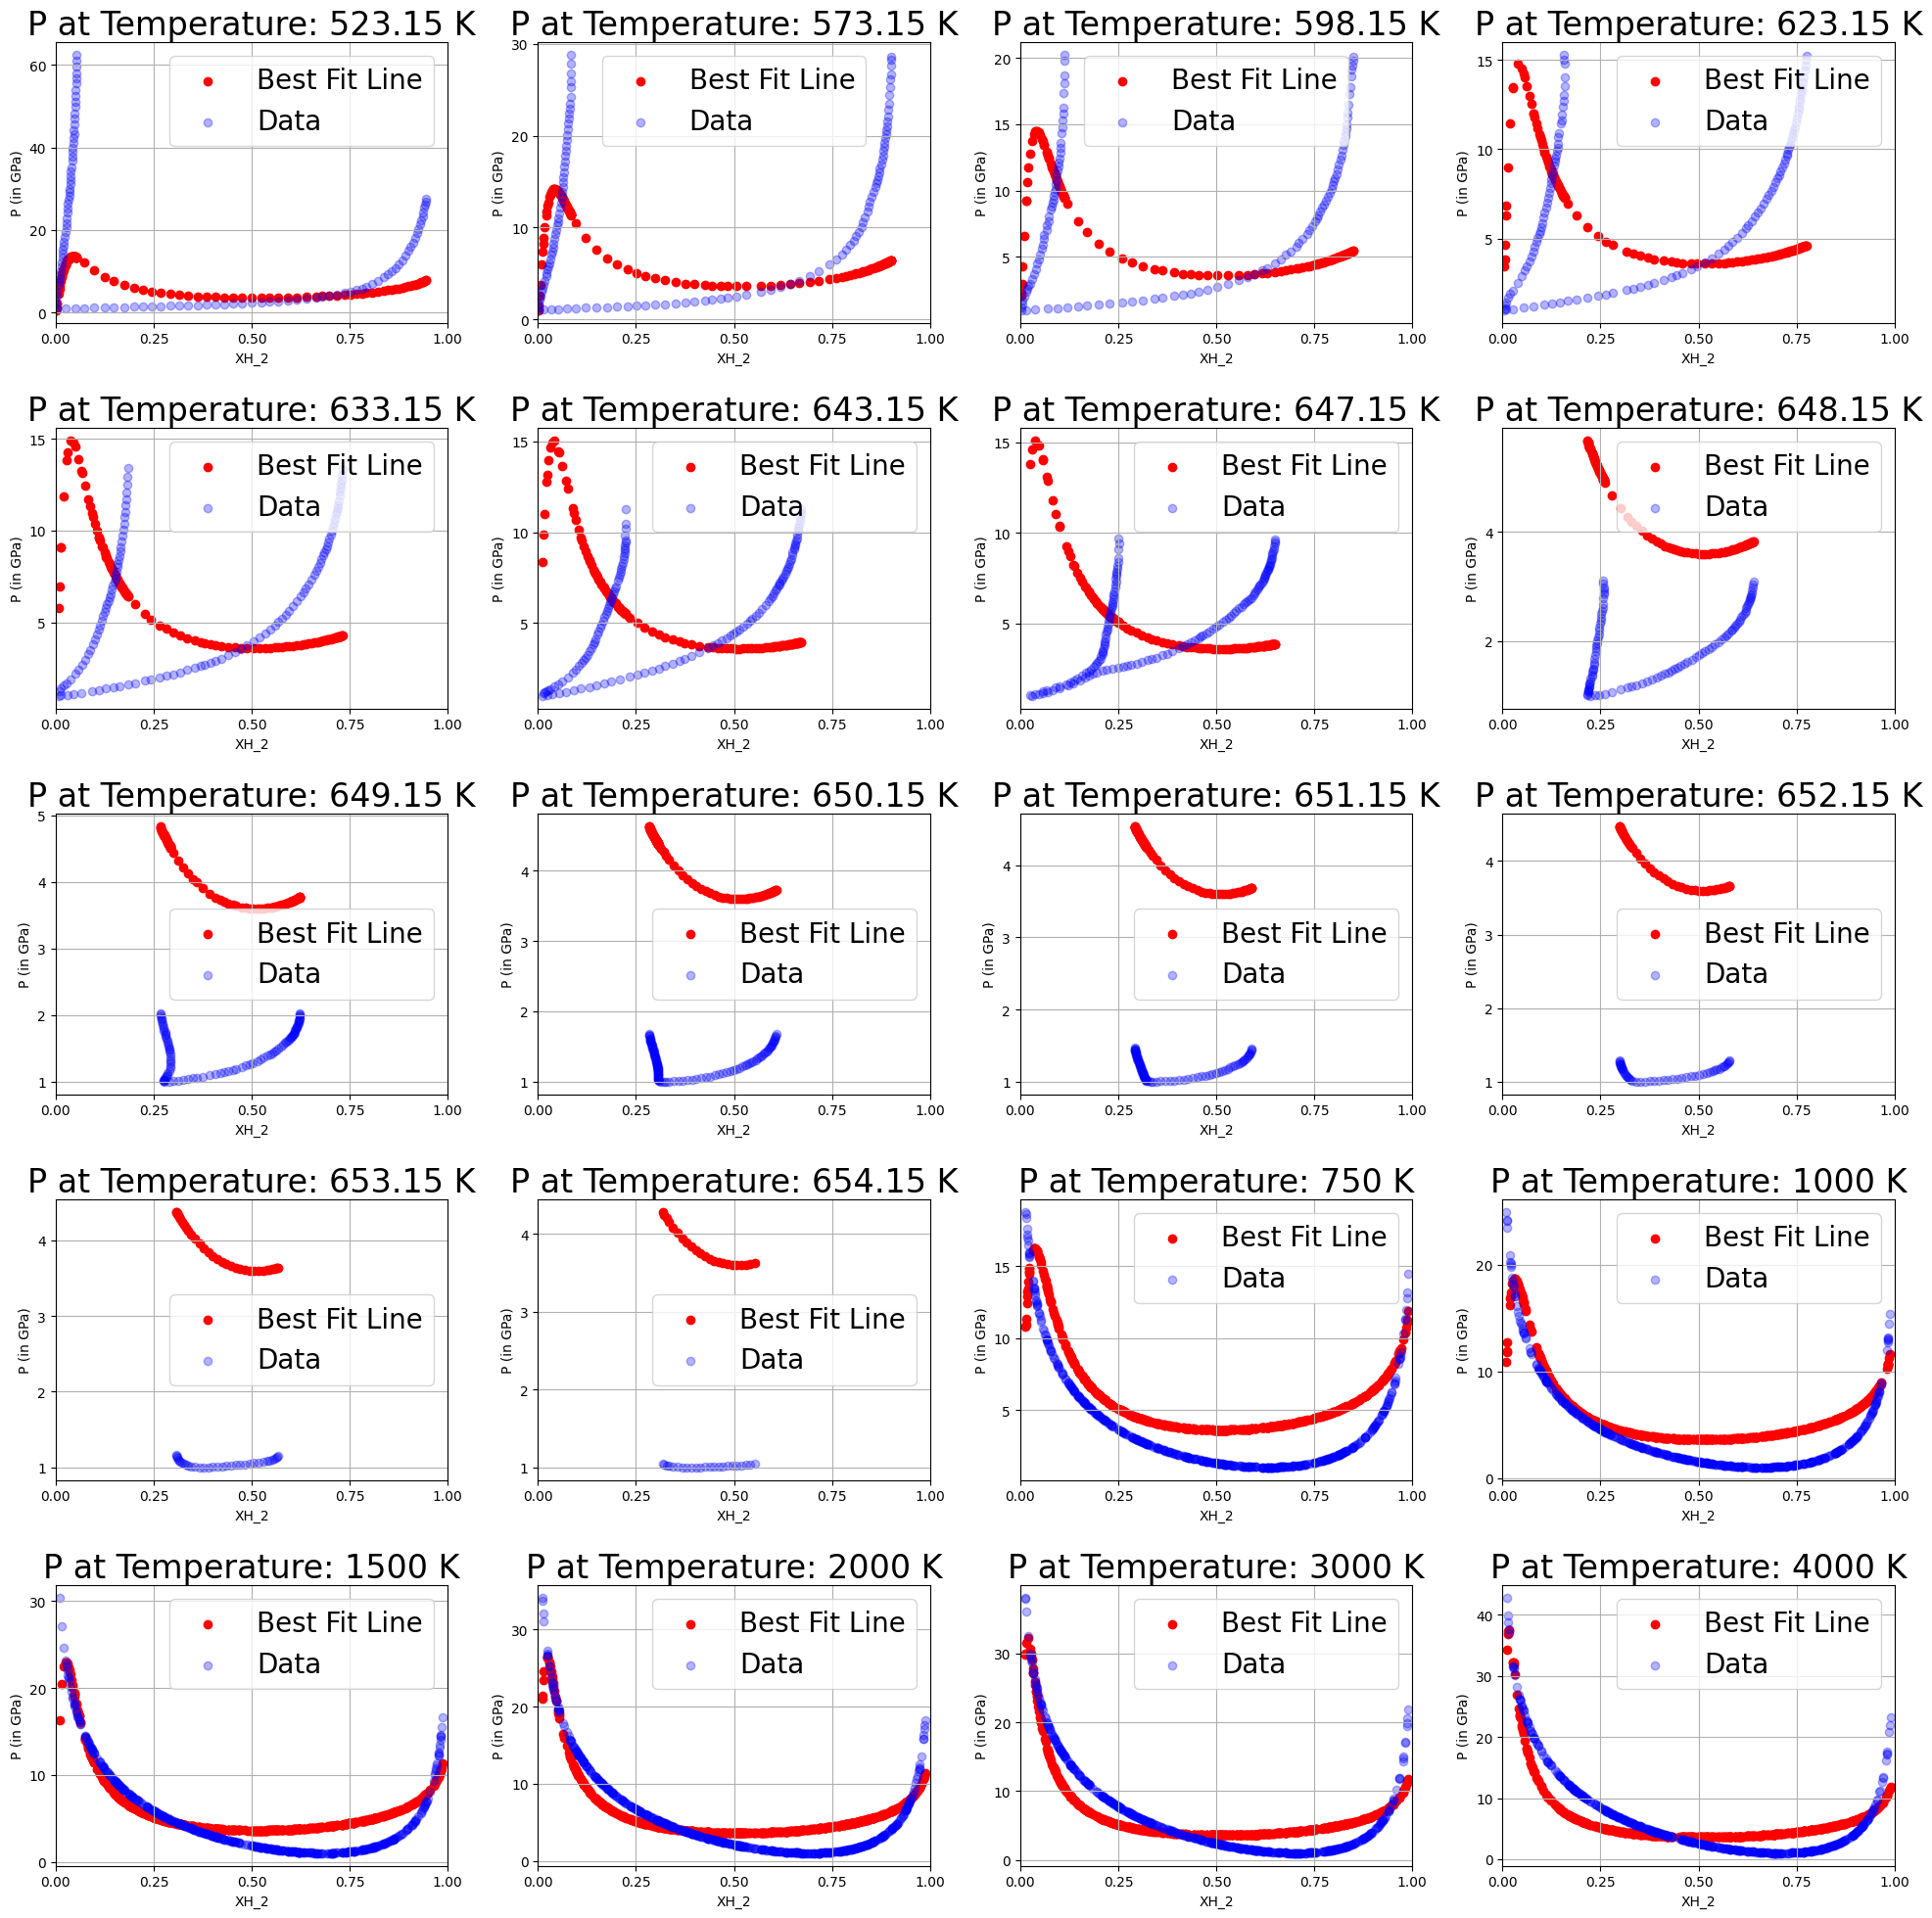

In [18]:
# Temperatures to loop over
temperatures = [523.15, 573.15, 598.15, 623.15, 633.15, 643.15, 647.15, 648.15, 649.15, 650.15, 651.15, 652.15, 653.15, 654.15, 750, 1000, 1500, 2000, 3000, 4000]
    
# Create figure and subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
plt.rcParams['font.size'] = 20

for i, temp in enumerate(temperatures):
    ind_arr = np.where(T_arr == temp)[0]
    
    # Refined data
    T_plot = T_arr[ind_arr]
    P_plot = P_norm_arr[ind_arr]
    XH2_plot = XH2_arr[ind_arr]

    # Replace x0 with XH2_plot and x1 with XH2_plot
    x0 = XH2_plot
    x1 = T_plot

    # Predict Y values
    # Y_pred = np.abs(((4.971377 - np.log(x1)) / 0.30998802) * np.log(np.sin(np.sin(1.971501 * np.tan(x0)))))
    Y_pred = (x1 / ((x0 * (x1 * 0.8457769)) + (0.8457769 / x0))) - (np.log(0.9992896 - x0) * (1.2986194 + x0))
    
    # Select subplot
    ax = axes[i // 4, i % 4] 
    
    # Plot the data and the best fit line
    ax.scatter(XH2_plot, Y_pred, label='Best Fit Line', color='red')
    ax.scatter(XH2_plot, P_plot, label='Data', color='blue', alpha=0.3)
    ax.set_xlabel('XH_2')
    ax.set_ylabel('P (in GPa)')
    ax.set_title(f'P at Temperature: {temp} K')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()